In [1]:
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV

from mlxtend.plotting import plot_decision_regions

In [2]:
X, y = make_moons(1000, shuffle=True, noise=0.2, random_state=0)

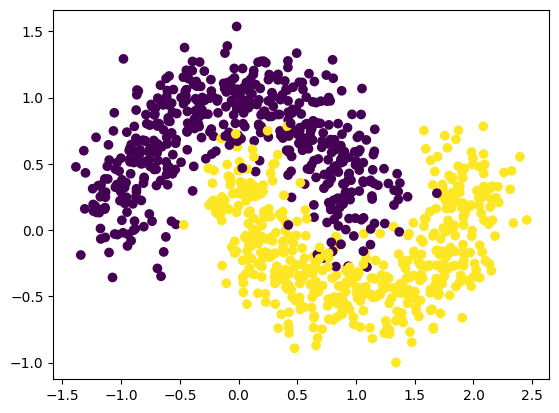

In [3]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)

In [5]:
param_grid = {
    "kernel": ["rbf", "linear", "poly"],
    "C": [0.1, 1, 10],
    "gamma": ["scale", "auto"]
}

In [6]:
gs = GridSearchCV(SVC(probability=True), param_grid=param_grid, cv=5, n_jobs=1, verbose=2 )

In [7]:
gs.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale,

GridSearchCV(cv=5, estimator=SVC(probability=True), n_jobs=1,
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'linear', 'poly']},
             verbose=2)

In [8]:
print('best params: ', gs.best_params_)

y_pred = gs.predict(X_test)
y_prob = gs.predict_proba(X_test)[:,1]

print('Accuracy:', accuracy_score(y_test, y_pred))
print('ROC_AUC:', roc_auc_score(y_test, y_prob))
print('Classification Report:\n', classification_report(y_test, y_pred))

best params:  {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Accuracy: 0.965
ROC_AUC: 0.9978864734299517
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96        92
           1       0.98      0.95      0.97       108

    accuracy                           0.96       200
   macro avg       0.96      0.97      0.96       200
weighted avg       0.97      0.96      0.97       200



In [9]:
sv = gs.best_estimator_.support_vectors_

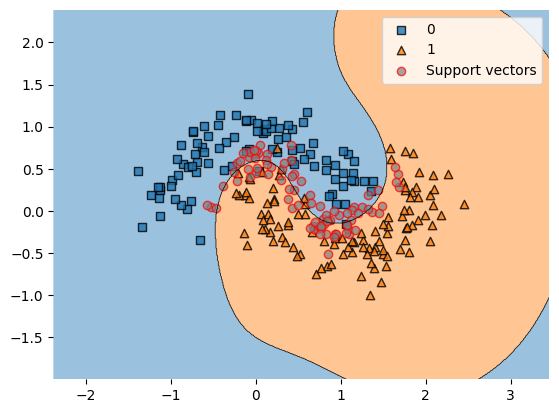

In [10]:
fig, ax = plt.subplots()

plot_decision_regions(X_test, y_test, gs, ax=ax)
ax.scatter(sv[:,0], sv[:,1] , facecolor='grey',edgecolors='red', alpha=0.7, label='Support vectors')

ax.legend(loc='best', frameon=True)
plt.show()